defining class of a point and details for grid.

In [1]:
NO_COLUMNS=3
NO_ROWS=3

target=8
pits=[6]

NO_OF_POINTS=NO_COLUMNS*NO_ROWS
class Point:
    no=0
    up=0
    down=0
    left=0
    right=0
    actions=[]
    def __init__(self,curr):
        self.no=curr
        #print(curr)
        if curr%NO_COLUMNS==1:
            #first column
            self.left=None
            pass
        elif curr%NO_COLUMNS==0:
            #last column
            self.right=None
            pass
        
        if int(curr/NO_COLUMNS)==0 or curr==NO_COLUMNS:
            #first row
            self.up=None
        elif int(curr/NO_COLUMNS)==NO_ROWS-1 or curr==NO_OF_POINTS:
            #first row
            self.down=None
        
    def printactions(self):
        print("for"+str(self.no)+" it is :")
        print(self.left)
        print(self.right)
        print(self.up)
        print(self.down)
    def validactions(self):
        actions=[]
        if self.left!=None:
            actions.append("left")
        if self.right!=None:
            actions.append("right")
        if self.up!=None:
            actions.append("up")
        if self.down!=None:
            actions.append("down")
        
        return actions,len(actions)

In [2]:
points=[]
for i in range(0,NO_OF_POINTS):
    x=Point(i+1)
    points.append(x)
    #points[i].printactions()

In [3]:
def gen_envlist():
    global env_list
    env_list=[]
    for x in range(1,NO_OF_POINTS):
        env_list.append(x)
    

In [4]:
import numpy as np
import pandas as pd
import time
import random
np.random.seed(2)  # reproducible

env_list=[]#['R','R','B','Y','Y','R','R','B','Y','Y']
gen_envlist()
N_STATES = NO_OF_POINTS #number of balls  #7   # the length of the 1 dimensional world
ACTIONS = ['left','right','up','down'] #number of binrs    # available actions
EPSILON = 0.9   # greedy police
ALPHA = 0.1 a    # learning rate
GAMMA = 0.9    # discount factor
MAX_EPISODES = 100  # maximum episodes
FRESH_TIME = 0.3    # fresh time for one move
plotrr=[]

In [5]:
def build_q_table(n_states, actions):
    table = pd.DataFrame(
        np.zeros((n_states, len(actions))),     # q_table initial values
        columns=actions,    # actions's name
    )
    # print(table)    # show table
    return table


In [6]:

def choose_action(state, q_table):
    # This is how to choose an action
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
        action_name = np.random.choice(ACTIONS)
    else:   # act greedy
        action_name = state_actions.idxmax()    # replace argmax to idxmax as argmax means a different function in newer version of pandas
    return action_name


In [7]:
def makemove(S,A):
    global NO_COLUMNS
    if A=='right':
        
        return S+1
    elif A=='left':
        return S-1
    elif A=='up':
        return S-NO_COLUMNS
    elif A=='down':
        return S+NO_COLUMNS
def get_env_feedback(S, A):
    global env_list,target
    # This is how agent will interact with the environment
    S_=makemove(S,A)
    if S_==target-1:
        S_ = 'terminal'
        R=1000
        pass
    elif (S_+1) in pits:
        R=-1000
        S_ = 'terminal'
        
    else:
        R=-50 
    print(str(R),A)
    
    return S_, R
    
    """
    if S==target-1:
        S_ = 'terminal'
        R=1000
        pass
    elif (S+1) in pits:
        R=-1000
        S_=makemove(S,A)
    else:
        S_=makemove(S,A)
        R=0
    plotrr.append(R)  
    if S_=='terminal':
        #print(S_)
        pass
    else:
        #print ( int(S_)+1 )
        pass
    """
    

In [8]:
def update_env(S, episode, step_counter):
    # This is how environment be updated
    
    global env_list
    #env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
    
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        #print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
        
        #interaction = ''.join(env_list)
        #print('\r{}'.format(interaction), end='')
        time.sleep(FRESH_TIME)


In [9]:
def rl():
    global ACTIONS,plotrr
    # main part of RL loop
    q_table = build_q_table(N_STATES, ACTIONS)
    plotrr=[]
    for episode in range(MAX_EPISODES):
        print(episode)
        #print(q_table)
        step_counter = 0
        S = 0
        is_terminated = False
        update_env(S, episode, step_counter)
        reward=0
        while not is_terminated:
            
            ACTIONS,n=points[S].validactions()
            #print(S, ACTIONS)
            A = choose_action(S, q_table)
            while  A not in ACTIONS:
                A = choose_action(S, q_table)
            S_, R = get_env_feedback(S, A)  # take action & get next state and reward
            q_predict = q_table.loc[S, A]
            reward+=R
            if S_ != 'terminal':
                #q_target = R + GAMMA * q_table.iloc[S_, :].max()  
                q_target = R + GAMMA * q_table.iloc[S_, :].max()   # next state is not terminal
            else:
                q_target = R     # next state is terminal
                is_terminated = True    # terminate this episode

            q_table.loc[S, A] += ALPHA * (q_target - q_predict)  # update
            S = S_  # move to next state

            update_env(S, episode, step_counter+1)
            step_counter += 1
        plotrr.append(reward)
    return q_table

In [10]:

if __name__ == "__main__":
    q_table = rl()
    print('\r\nQ-table:\n')
    print(q_table)
    

0
-50 down
-50 down
-50 up
-50 right
-50 up
-50 left
-50 right
-50 right
-50 left
-50 down
-50 left
-50 up
-50 right
-50 down
-1000 right
                                1
-50 down
-50 down
1000 right
                                2
-50 down
-50 up
-50 down
-50 down
1000 right
                                3
-50 right
-50 right
-50 left
-50 right
-1000 down
                                4
-50 down
-50 up
-50 right
-50 down
1000 down
                                5
-50 right
-50 left
-50 right
-50 left
-50 down
-50 right
1000 down
                                6
-50 down
-50 down
1000 right
                                7
-50 down
-50 down
1000 right
                                8
-50 down
-50 down
1000 right
                                9
-50 right
-50 right
-50 left
-50 right
-50 left
-50 left
-50 right
-50 left
-50 down
-50 down
1000 right
                                10
-50 right
-50 left
-50 right
-50 down
-50 left
-50 down
1000 right
                          

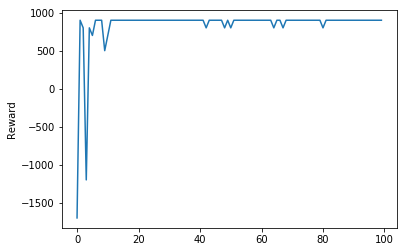

In [11]:
import matplotlib.pyplot as plt
plt.plot(plotrr)
plt.ylabel('Reward')
plt.xlabel('episodes')
plt.show()